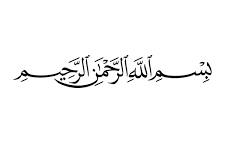

#  **Import Libraries**

In [1]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 6.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import sys


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


#   **Data Loading and Preparation**

**1.Load Arabic Quran dataset**

In [51]:
import pandas as pd
arabic_df=pd.read_csv('/content/Arabic-Original.csv')

In [55]:
import pandas as pd

# Load the Arabic Quran data from the CSV file
# Update the file path as needed
arabic_df = pd.read_csv('/content/Arabic-Original.csv', header=None)

# Display the info of the loaded DataFrame
print(arabic_df.info())

# Split the first column into Surah, Ayah, and Text
split_values = arabic_df[0].str.split('|', expand=True)

# Assign the split values to new columns
arabic_df['Surah'] = split_values[0]
arabic_df['Ayah'] = split_values[1]
arabic_df['Text'] = split_values[2]

# Drop the original combined column (index 0)
arabic_df.drop(columns=[0], inplace=True)

# Display the updated DataFrame information
print(arabic_df.info())

# Optionally display the first few rows to verify the changes
print(arabic_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       6236 non-null   object
dtypes: object(1)
memory usage: 48.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Surah   6236 non-null   object
 1   Ayah    6236 non-null   object
 2   Text    6236 non-null   object
dtypes: object(3)
memory usage: 146.3+ KB
None
  Surah Ayah                                      Text
0     1    1    بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ
1     1    2     الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2     1    3                   الرَّحْمَٰنِ الرَّحِيمِ
3     1    4                   مَالِكِ يَوْمِ الدِّينِ
4     1    5  إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ


In [56]:
arabic_df.head()

,Surah,Ayah,Text
0,1,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ
1,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,1,3,الرَّحْمَٰنِ الرَّحِيمِ
3,1,4,مَالِكِ يَوْمِ الدِّينِ
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ


In [7]:
arabic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6235 entries, 0 to 6234
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Surah   6235 non-null   object
 1   Ayah    6235 non-null   object
 2   Text    6235 non-null   object
dtypes: object(3)
memory usage: 146.3+ KB


Ensure Surah and Ayah are integers for proper merging

In [8]:
arabic_df['Surah'] = arabic_df['Surah'].astype(int)
arabic_df['Ayah'] = arabic_df['Ayah'].astype(int)

**2.Load Arabic Quran dataset**

In [57]:
import pandas as pd
data_english=pd.read_csv('/content/Quran_English.csv')

In [58]:
data_english.head()

,Name,Surah,Ayat,Verse
0,The Opening,1,1,"In the name of Allah, the Beneficent, the Merc..."
1,The Opening,1,2,"Praise be to Allah, Lord of the Worlds,"
2,The Opening,1,3,"The Beneficent, the Merciful."
3,The Opening,1,4,"Owner of the Day of Judgment,"
4,The Opening,1,5,Thee (alone) we worship; Thee (alone) we ask f...


In [59]:
data_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    6236 non-null   object
 1   Surah   6236 non-null   int64 
 2   Ayat    6236 non-null   int64 
 3   Verse   6236 non-null   object
dtypes: int64(2), object(2)
memory usage: 195.0+ KB


# **Embedding Generation**



*   Generates embeddings for the English Quran verses.
1.  Pre-trained SentenceTransformer model(all-MiniLM-L6-v2)
2.  Creates vector embeddings for each English verse, facilitating semantic similarity computations.

1.   Adds the embeddings to the english_df DataFrame
2.   Arabic dataset of quran remains same







In [60]:


def generate_embeddings(english_df, model_name='all-MiniLM-L6-v2'):
    """
    Generates embeddings for the English Quran verses.

    Parameters:
    - english_df (DataFrame): English Quran DataFrame.
    - model_name (str): Pre-trained SentenceTransformer model name.

    Returns:
    - english_df (DataFrame): Updated DataFrame with embeddings.
    - model (SentenceTransformer): Loaded SentenceTransformer model.
    """
    print("Loading SentenceTransformer model...")
    model = SentenceTransformer(model_name)

    print("Generating embeddings for English Quran verses...")
    embeddings = model.encode(english_df['Verse'].tolist(), show_progress_bar=True)
    english_df['Embedding'] = list(embeddings)  # Convert to list of lists
    print("Embeddings generated.")

    return english_df, model


# . **Find the Verse Related to user Query**




*   Handles user queries and responds with semantically matched Quran verses.


1.   A pre-trained Sentence Transformer model used to generate embedding of user query and compare embeddings with English verses of Quran .
2.   The number of top similar verses to retrieve based on semantic similarity.

1.   We took the Surah and verse number of the top N verses and fetched the corresponding verses from the Arabic dataset.








In [61]:
# --------------------- Semantic Search Function ---------------------


def search_quran_semantic(query, english_df, arabic_df, model, top_n=5):
    """
    Searches the Quran for verses semantically related to the query.

    Parameters:
    - query (str): User's search query.
    - english_df (DataFrame): English Quran DataFrame with embeddings.
    - arabic_df (DataFrame): Arabic Quran DataFrame.
    - model (SentenceTransformer): Pre-trained Sentence Transformer model.
    - top_n (int): Number of top similar verses to retrieve.

    Returns:
    - List of dictionaries containing Surah, Ayah, English and Arabic texts.
    """
    # Generate embedding for the query
    query_embedding = model.encode([query])

    # Compute cosine similarity between query and all verse embeddings
    # Convert list of embeddings to numpy array for efficient computation
    verse_embeddings = np.array(english_df['Embedding'].tolist())
    similarities = cosine_similarity(query_embedding, verse_embeddings)[0]

    # Get indices of top N similar verses
    top_indices = similarities.argsort()[-top_n:][::-1]

    results = []
    for idx in top_indices:
        verse_info = english_df.iloc[idx]
        surah = verse_info['Surah']
        ayah = verse_info['Ayat']
        english_text = verse_info['Verse']
        similarity_score = similarities[idx]

        # Fetch corresponding Arabic verse
        arabic_match = arabic_df[(arabic_df['Surah'] == str(surah)) & (arabic_df['Ayah'] == str(ayah))]
        arabic_text = arabic_match['Text'].values[0]
        if not arabic_match.empty:
            arabic_text = arabic_match['Text'].values[0]
        else:
            arabic_text = "Arabic verse not found."

        results.append({
            'Surah': surah,
            'Ayah': ayah,
            'English': english_text,
            'Arabic': arabic_text,
            'Similarity': similarity_score
        })

    return results



# **Respond the User**



*   Processes the search results and formats them into a coherent response for the user




In [62]:
# --------------------- Chatbot Interaction ---------------------

def respond_to_user_semantic(query, english_df, arabic_df, model, top_n=5):
    """
    Handles user queries and responds with semantically matched Quran verses.

    Parameters:
    - query (str): User's search query.
    - english_df (DataFrame): English Quran DataFrame with embeddings.
    - arabic_df (DataFrame): Arabic Quran DataFrame.
    - model (SentenceTransformer): Pre-trained Sentence Transformer model.
    - top_n (int): Number of top similar verses to retrieve.

    Returns:
    - Formatted string with matched verses.
    """
    results = search_quran_semantic(query, english_df, arabic_df, model, top_n)

    if not results:
        return "Sorry, I couldn't find any related verses."

    # Formatting the results for the chatbot output
    response = f"Found {len(results)} matching verse(s):\n\n"
    for result in results:
        surah = result['Surah']
        ayah = result['Ayah']
        english_text = result['English']
        arabic_text = result['Arabic']
        similarity = result['Similarity']
        response += (
            f"**Surah {surah}, Ayah {ayah}**\n"
            f"Similarity Score: {similarity:.4f}\n"
            f"English: {english_text}\n"
            f"Arabic: {arabic_text}\n\n"
        )

    return response


# **Main Function**

In [63]:
def quran_chatbot_semantic():
    """
    Runs the Quran chatbot with semantic search capabilities.
    """
    # File paths (modify these paths as needed)
    # english_file = '/content/Quran_English.csv'  # Replace with actual file path
    # arabic_file = '/content/Arabic-Original.csv'  # Replace with actual file path

    # Load Quran data
    # english_df, arabic_df = load_quran_data(english_file, arabic_file)
    english_df=data_english
    arabic=arabic_df

    # Generate embeddings
    english_df, model = generate_embeddings(english_df)

    print("Welcome to the Quran Semantic Search Chatbot. Ask me anything about the Quran.")
    print("Type 'exit' or 'quit' to end the conversation.\n")

    while True:
        query = input("You: ").strip()
        if query.lower() in ["exit", "quit"]:
            print("Chatbot: Goodbye!")
            break

        if not query:
            print("Chatbot: Please enter a valid query.")
            continue

        # Get response for the query
        response = respond_to_user_semantic(query, english_df, arabic, model, top_n=5)
        print(f"Chatbot:\n{response}")



In [64]:


if __name__ == "__main__":
    quran_chatbot_semantic()


Loading SentenceTransformer model...


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Generating embeddings for English Quran verses...


Batches:   0%|          | 0/195 [00:00<?, ?it/s]

Embeddings generated.
Welcome to the Quran Semantic Search Chatbot. Ask me anything about the Quran.
Type 'exit' or 'quit' to end the conversation.

You: What allah has said about charity
Chatbot:
Found 5 matching verse(s):

**Surah 2, Ayah 267**
Similarity Score: 0.7093
English: O ye who believe! Spend of the good things which ye have earned, and of that which We bring forth from the earth for you, and seek not the bad (with intent) to spend thereof (in charity) when ye would not take it for yourselves save with disdain; and know that Allah is Absolute, Owner of Praise.
Arabic: يَا أَيُّهَا الَّذِينَ آمَنُوا أَنْفِقُوا مِنْ طَيِّبَاتِ مَا كَسَبْتُمْ وَمِمَّا أَخْرَجْنَا لَكُمْ مِنَ الْأَرْضِ ۖ وَلَا تَيَمَّمُوا الْخَبِيثَ مِنْهُ تُنْفِقُونَ وَلَسْتُمْ بِآخِذِيهِ إِلَّا أَنْ تُغْمِضُوا فِيهِ ۚ وَاعْلَمُوا أَنَّ اللَّهَ غَنِيٌّ حَمِيدٌ

**Surah 35, Ayah 15**
Similarity Score: 0.6228
English: O mankind! Ye are the poor in your relation to Allah. And Allah! He is the Absolute, the Owner o